# Labeling Menggunakan K-Means

k-means memang termasuk unsupervised learning, namun pada kasus ini saya membutuhkan labeling untuk proses sentimen analysis menggunakan supervised learning. yang saya tau untuk labeling menggunakan supervised learning memiliki 3 cara yaitu


1.   Dengan melabeli sendiri secara manual
2.   Meminta responden melabeli secara manual
3.   Meminta pakar melabeli text.

karena 3 cara diatas itu cukup rumit dan belum tentu juga saya jika melabeli sendiri benar, apalagi di labeli orang lain, belum tentu ada yang mau, untuk pakar saya juga kurang tau. oleh karena itu saya membuat cluster untuk labeling.

In [51]:
import pandas as pd
dataset= pd.read_csv("18102072_Wisanti_A.csv")
dataset.head()

username                                              tweet
0  latarterkemban4             #tolakruu_ikn  https://t.co/TSsynqbBFM
1       ratu_tagar  Jika sumber daya manusia di suatu negara berku...
2  latarterkemban4             #TolakRUU_IKN  https://t.co/inISfLLuRe
3          miyoels  Saya perhatiin, kalo kita googling tentang doa...
4    inyongbralink  @kusmayadi2409 @c1nt4_2l2 @wierboy @BunnyPosit...

In [52]:
# menghapus kolom username
mydata = dataset.drop(['username'], axis=1)
mydata.head()


tweet
0             #tolakruu_ikn  https://t.co/TSsynqbBFM
1  Jika sumber daya manusia di suatu negara berku...
2             #TolakRUU_IKN  https://t.co/inISfLLuRe
3  Saya perhatiin, kalo kita googling tentang doa...
4  @kusmayadi2409 @c1nt4_2l2 @wierboy @BunnyPosit...

In [53]:
import re
# fungsi untuk menghapus teks
def clean(text):
# menghapus semua karakter dan numerik 
 text = re.sub('[^A-Za-z]+', ' ', text)
 return text
# menghapus teks dan memasukanya di kolom tweet
mydata['tweet'] =mydata['tweet'].apply(clean)
mydata.head()


tweet
0                 tolakruu ikn https t co TSsynqbBFM
1  Jika sumber daya manusia di suatu negara berku...
2                 TolakRUU IKN https t co inISfLLuRe
3  Saya perhatiin kalo kita googling tentang doa ...
4   kusmayadi c nt l wierboy BunnyPositively Bam ...

In [54]:
#case folding
mydata["tweet_cf"]= mydata["tweet"].str.lower()

print(mydata["tweet_cf"].head())

0                   tolakruu ikn https t co tssynqbbfm
1    jika sumber daya manusia di suatu negara berku...
2                   tolakruu ikn https t co inisfllure
3    saya perhatiin kalo kita googling tentang doa ...
4     kusmayadi c nt l wierboy bunnypositively bam ...
Name: tweet_cf, dtype: object


In [55]:
#mengubah isi tweet_cf menjadi unicode
document = mydata['tweet_cf'].values.astype("U")

In [56]:
#stopword
vectorizer = TfidfVectorizer(stop_words="english")
features = vectorizer.fit_transform(document)

In [57]:
#membuat model k-means
import numpy as np
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=2, random_state=1)
kmeans_model.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [58]:
#membuat kolom cluster pada dataframe
mydata['cluster'] = kmeans_model.labels_

In [59]:
mydata

tweet  ... cluster
0                    tolakruu ikn https t co TSsynqbBFM  ...       0
1     Jika sumber daya manusia di suatu negara berku...  ...       0
2                    TolakRUU IKN https t co inISfLLuRe  ...       0
3     Saya perhatiin kalo kita googling tentang doa ...  ...       0
4      kusmayadi c nt l wierboy BunnyPositively Bam ...  ...       0
...                                                 ...  ...     ...
1017  Semakin ngotot pindah ibukota teriakan MUNDUR ...  ...       0
1018   marlina idha Ayo FaldoMaldini minta dalil dg ...  ...       0
1019   Tahap kebijaksanaan pindah ibu kota MPR bersi...  ...       0
1020   FazaQuin BalvyHaddad Pindah ikn tdk diperluka...  ...       0
1021   lebhor didienAZHAR TolakRUU IKN TolakRUU IKN ...  ...       0

[1022 rows x 3 columns]

In [60]:
#melihat hasil cluster
hasil = mydata.cluster.value_counts()
hasil

0    890
1    132
Name: cluster, dtype: int64

In [64]:
#membuat dataframe baru yang berisi kolom tweet dan cluster saja
hasil_akhir = pd.DataFrame(mydata[['tweet', 'cluster']])

In [65]:
#mengubah dataframe ke csv
hasil_akhir.to_csv("hasil.csv")

# Labeling menggunakan Text Blob

Text Blob merupakan salah satu metode lexicon based sentiment analysis.Textblob merupakan salah satu tools atau lebih tepatnya library untuk pemprosesan dibidang "Natural Language Processing (NLP)" menggunakan bahasa python.

melalui textblob, kita dapat melakukan berbagai proses terhadap data teks mulai dari yang sederhana seperti tokenisasi (pemotongan kata) sampai analisa sentiment. sayangnya textblob memang belum diimplementasikan untuk bahasa Indonesia sehingga analisa sentiment dalam bahasa Indonesia tidak dapat dilakukan secara langsung. Namun untuk beberapa fungsi dasar dalam bidang NLP, textblob tetap berguna untuk memproses data teks bahasa indonesia.

In [ ]:
#instal library nltk dan textblob
!pip install nltk
!pip install textblob

In [ ]:
import nltk
nltk.download('punkt')

In [23]:
#Stopword, pos tagging, tokenize
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

mydata['POS tagged'] = mydata['tweet_cf'].apply(token_stop_pos)
mydata.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


tweet  ...                                         POS tagged
0                 tolakruu ikn https t co TSsynqbBFM  ...  [(tolakruu, n), (ikn, n), (https, n), (co, n),...
1  Jika sumber daya manusia di suatu negara berku...  ...  [(jika, a), (sumber, n), (daya, n), (manusia, ...
2                 TolakRUU IKN https t co inISfLLuRe  ...  [(tolakruu, n), (ikn, n), (https, n), (co, n),...
3  Saya perhatiin kalo kita googling tentang doa ...  ...  [(saya, n), (perhatiin, n), (kalo, n), (kita, ...
4   kusmayadi c nt l wierboy BunnyPositively Bam ...  ...  [(kusmayadi, n), (c, v), (nt, a), (l, n), (wie...

[5 rows x 3 columns]

In [24]:
#Steeming kata menggunakan lemmatization
#Lemmatization
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

mydata['Lemma'] = mydata['POS tagged'].apply(lemmatize)
mydata.head()

tweet  ...                                              Lemma
0                 tolakruu ikn https t co TSsynqbBFM  ...                    tolakruu ikn http co tssynqbbfm
1  Jika sumber daya manusia di suatu negara berku...  ...    jika sumber daya manusia di suatu negara ber...
2                 TolakRUU IKN https t co inISfLLuRe  ...                    tolakruu ikn http co inisfllure
3  Saya perhatiin kalo kita googling tentang doa ...  ...    saya perhatiin kalo kita google tentang doa ...
4   kusmayadi c nt l wierboy BunnyPositively Bam ...  ...    kusmayadi c nt l wierboy bunnypositively bam...

[5 rows x 4 columns]

In [25]:
#mengambil hanya kolom tweet_cf dan Lemma
mydata[['tweet_cf', 'Lemma']]

tweet_cf                                              Lemma
0                    tolakruu ikn https t co tssynqbbfm                    tolakruu ikn http co tssynqbbfm
1     jika sumber daya manusia di suatu negara berku...    jika sumber daya manusia di suatu negara ber...
2                    tolakruu ikn https t co inisfllure                    tolakruu ikn http co inisfllure
3     saya perhatiin kalo kita googling tentang doa ...    saya perhatiin kalo kita google tentang doa ...
4      kusmayadi c nt l wierboy bunnypositively bam ...    kusmayadi c nt l wierboy bunnypositively bam...
...                                                 ...                                                ...
1017  semakin ngotot pindah ibukota teriakan mundur ...    semakin ngotot pindah ibukota teriakan mundu...
1018   marlina idha ayo faldomaldini minta dalil dg ...    marlina idha ayo faldomaldini minta dalil dg...
1019   tahap kebijaksanaan pindah ibu kota mpr bersi...    tahap kebijaksanaan pindah ibu kota mpr bers...
1020   fazaquin balvyhaddad pindah ikn tdk diperluka...    fazaquin balvyhaddad pindah ikn tdk diperluk...
1021   lebhor didienazhar tolakruu ikn tolakruu ikn ...    lebhor didienazhar tolakruu ikn tolakruu ikn...

[1022 rows x 2 columns]

In [26]:
#Sentimen Analysis menggunakan text blob
from textblob import TextBlob

# function to calculate subjectivity
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

# function to calculate polarity
def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return '1'
    else:
        return '0'

In [27]:
#membuat polarity dan analisis sentimen
mydata['Polarity'] = mydata['Lemma'].apply(getPolarity)
mydata['Analysis'] = mydata['Polarity'].apply(analysis)
mydata.head(50)

tweet  ... Analysis
0                  tolakruu ikn https t co TSsynqbBFM  ...        0
1   Jika sumber daya manusia di suatu negara berku...  ...        0
2                  TolakRUU IKN https t co inISfLLuRe  ...        0
3   Saya perhatiin kalo kita googling tentang doa ...  ...        0
4    kusmayadi c nt l wierboy BunnyPositively Bam ...  ...        0
5    inal AnizMiarsa suryamurti Devon goal xNih w ...  ...        0
6                         Im Furqanjurdi TolakRUU IKN  ...        0
7    inal djebrag W NDU P zunzun mardiono batman e...  ...        0
8    Hadiah Hiburan D Dan D Acak Bayar Bonus Depos...  ...        0
9                 Joeborneo TolakRUU IKN TolakRUU IKN  ...        0
10   inal djebrag voicetabbb W NDU P zunzun mardio...  ...        0
11   inal djebrag voicetabbb W NDU P zunzun mardio...  ...        0
12   TolakRUU IKN TolakRUU IKN klik https t co WPt...  ...        0
13                    Bangsat kok memang TolakRUU IKN  ...        0
14     https t co MILZpiW z TolakRUU IKN TolakRUU IKN  ...        0
15                               DzauZie TolakRUU IKN  ...        0
16   MissKoral NetizenBerisik AntonTenabang Thavit...  ...        0
17   Arindra Dikit demo Dikit ngambek bikin susah ...  ...        0
18   ridhorahadi msaid didu Wah gelasih inimah Tol...  ...        0
19          Bukan prioritas TolakRUU IKN TolakRUU IKN  ...        0
20          Bukan prioritas TolakRUU IKN TolakRUU IKN  ...        0
21          Bukan prioritas TolakRUU IKN TolakRUU IKN  ...        0
22          Bukan prioritas TolakRUU IKN TolakRUU IKN  ...        0
23          Bukan prioritas TolakRUU IKN TolakRUU IKN  ...        0
24   eramilenial democrazymedia gusmiftah PANCA SI...  ...        0
25   PanciBozz cintah PujanggaTiter T ean M eda ba...  ...        0
26  Semakin ngotot pindah ibukota teriakan MUNDUR ...  ...        0
27   marlina idha Ayo FaldoMaldini minta dalil dg ...  ...        0
28   Tahap kebijaksanaan pindah ibu kota MPR bersi...  ...        0
29   FazaQuin BalvyHaddad Pindah ikn tdk diperluka...  ...        0
30   lebhor didienAZHAR TolakRUU IKN TolakRUU IKN ...  ...        0
31                 tolakruu ikn https t co TSsynqbBFM  ...        0
32  Jika sumber daya manusia di suatu negara berku...  ...        0
33                 TolakRUU IKN https t co inISfLLuRe  ...        0
34  Saya perhatiin kalo kita googling tentang doa ...  ...        0
35   kusmayadi c nt l wierboy BunnyPositively Bam ...  ...        0
36   inal AnizMiarsa suryamurti Devon goal xNih w ...  ...        0
37                        Im Furqanjurdi TolakRUU IKN  ...        0
38   inal djebrag W NDU P zunzun mardiono batman e...  ...        0
39   Hadiah Hiburan D Dan D Acak Bayar Bonus Depos...  ...        0
40                Joeborneo TolakRUU IKN TolakRUU IKN  ...        0
41   inal djebrag voicetabbb W NDU P zunzun mardio...  ...        0
42   inal djebrag voicetabbb W NDU P zunzun mardio...  ...        0
43                 tolakruu ikn https t co TSsynqbBFM  ...        0
44  Jika sumber daya manusia di suatu negara berku...  ...        0
45                 TolakRUU IKN https t co inISfLLuRe  ...        0
46  Saya perhatiin kalo kita googling tentang doa ...  ...        0
47   kusmayadi c nt l wierboy BunnyPositively Bam ...  ...        0
48   inal AnizMiarsa suryamurti Devon goal xNih w ...  ...        0
49                        Im Furqanjurdi TolakRUU IKN  ...        0

[50 rows x 6 columns]

In [29]:
#melihat hasil sentimen menggunakan text blob
hasil_textblob = mydata.Analysis.value_counts()
hasil_textblob

0    1019
1       3
Name: Analysis, dtype: int64

In [30]:
#membuat dataframe baru yang berisi kolom tweet_cf dan Analysis
dataset_fin = pd.DataFrame(mydata[['tweet_cf', 'Analysis']])

In [ ]:
dataset_fin

In [34]:
dataset_fin.to_csv("dataset final.csv")

#Random Forest Classifier Labeling With Text Blob

In [38]:
import warnings #import library
warnings.filterwarnings('ignore') # menghide segala macam notif warning
import pandas as pd #import library
# membaca file dataset
df_train = pd.read_csv('dataset final.csv',sep=",",index_col=0)

In [39]:
df_train.head()

tweet_cf  Analysis
0                 tolakruu ikn https t co tssynqbbfm         0
1  jika sumber daya manusia di suatu negara berku...         0
2                 tolakruu ikn https t co inisfllure         0
3  saya perhatiin kalo kita googling tentang doa ...         0
4   kusmayadi c nt l wierboy bunnypositively bam ...         0

In [40]:
df_train["Analysis"].value_counts()

0    1019
1       3
Name: Analysis, dtype: int64

In [41]:
train = df_train['tweet_cf']

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer #import library
# melakukan tfidf
tfidfVectorizer = TfidfVectorizer(max_features =7000)
train_data = tfidfVectorizer.fit_transform(train)

In [43]:
train_data.shape

(1022, 847)

In [44]:
# memilih data x dan y
y = df_train['Analysis']
y = y.values

X = train_data
X = X.toarray()

In [45]:
# melihat informasi dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 0 to 1021
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_cf  1022 non-null   object
 1   Analysis  1022 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 24.0+ KB


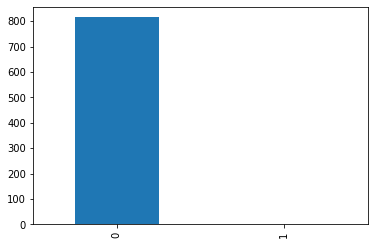

In [46]:
#melihat grafik sentimen
from sklearn import model_selection, preprocessing #import library
from matplotlib import pyplot as plt #import library
#split train 80% & test 20%
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y,stratify = y, test_size=0.2) 
#plot data y train
pd.value_counts(y_train).plot.bar()

In [49]:
#melakukan sentimen analysis menggunakan Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics #import library
from sklearn.metrics import confusion_matrix #import library
from sklearn.metrics import classification_report #import library

x_train, y_train = make_classification(n_samples=1000, n_features=847, n_informative=2, n_redundant=0, random_state=0, shuffle=False)

clf = RandomForestClassifier(max_depth=2, random_state=0)

# mentrain data
clf.fit(x_train, y_train)

# memprediksi nilai x, menggunakan model
y_preds = clf.predict(x_test)

print("===============================================")
print(f"Accuracy : ",metrics.accuracy_score(y_test, y_preds)) # memanggil fungsi menghitung akurasi
print("===========classification_report===============")
print(classification_report(y_test, y_preds)) # memanggil fungsi report klasifikasi 
print("===============================================")
print(f"Confusion Matrix :",confusion_matrix(y_test, y_preds)) # memanggil fungsi Confusion Matrix 

Accuracy :  0.004878048780487805
===========classification_report===============
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       204
           1       0.00      1.00      0.01         1

    accuracy                           0.00       205
   macro avg       0.00      0.50      0.00       205
weighted avg       0.00      0.00      0.00       205

Confusion Matrix : [[  0 204]
 [  0   1]]


hasil akurasinya sangat kecil hanya 0,5% karena labelingnya tidak seimbang, karena yang bernilai positif hanya 3 data, sedangkan yang negatif ada 1019 data, mungkin dilain kesempatan jika ingin menggunakan supervised learning harus diolah kembali datanya agar hasil akurasi lebih tinggi.

# Random Forest Classifier Labeling With K-Means

In [66]:
import warnings #import library
warnings.filterwarnings('ignore') # menghide segala macam notif warning
import pandas as pd #import library
# membaca file dataset
df_train = pd.read_csv('hasil.csv',sep=",",index_col=0)

In [67]:
df_train.head()

tweet  cluster
0                 tolakruu ikn https t co TSsynqbBFM        0
1  Jika sumber daya manusia di suatu negara berku...        0
2                 TolakRUU IKN https t co inISfLLuRe        0
3  Saya perhatiin kalo kita googling tentang doa ...        0
4   kusmayadi c nt l wierboy BunnyPositively Bam ...        0

In [68]:
df_train["cluster"].value_counts()

0    890
1    132
Name: cluster, dtype: int64

In [69]:
train = df_train['tweet']

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer #import library
# melakukan tfidf
tfidfVectorizer = TfidfVectorizer(max_features =7000)
train_data = tfidfVectorizer.fit_transform(train)

In [71]:
train_data.shape

(1022, 847)

In [72]:
# memilih data x dan y
y = df_train['cluster']
y = y.values

X = train_data
X = X.toarray()

In [73]:
# melihat informasi dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 0 to 1021
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tweet    1022 non-null   object
 1   cluster  1022 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 24.0+ KB


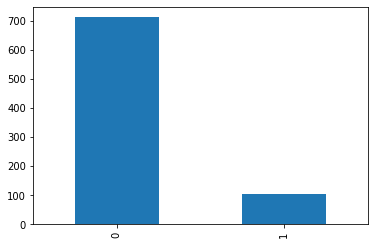

In [74]:
from sklearn import model_selection, preprocessing #import library
from matplotlib import pyplot as plt #import library
#split train 80% & test 20%
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y,stratify = y, test_size=0.2) 
#plot data y train
pd.value_counts(y_train).plot.bar()

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics #import library
from sklearn.metrics import confusion_matrix #import library
from sklearn.metrics import classification_report #import library

x_train, y_train = make_classification(n_samples=1000, n_features=847, n_informative=2, n_redundant= 0, random_state=0, shuffle=False)

clf = RandomForestClassifier(max_depth=2, random_state=0)

# mentrain data
clf.fit(x_train, y_train)

# memprediksi nilai x, menggunakan model
y_preds = clf.predict(x_test)

print("===============================================")
print(f"Accuracy : ",metrics.accuracy_score(y_test, y_preds)) # memanggil fungsi menghitung akurasi
print("===========classification_report===============")
print(classification_report(y_test, y_preds)) # memanggil fungsi report klasifikasi 
print("===============================================")
print(f"Confusion Matrix :",confusion_matrix(y_test, y_preds)) # memanggil fungsi Confusion Matrix 

Accuracy :  0.12682926829268293
===========classification_report===============
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       179
           1       0.13      1.00      0.23        26

    accuracy                           0.13       205
   macro avg       0.06      0.50      0.11       205
weighted avg       0.02      0.13      0.03       205

Confusion Matrix : [[  0 179]
 [  0  26]]


hasil akurasinya hanya 13% namun dengan bantuan labeling dengan k-means hasilnya lebih baik dibandingkan menggunakan text blob yang hanya 0,5%, kembali lagi hasil akhir ini bisa terjadi karena hasil labelingnya, berbeda dengan lexicon, sentimen analysis menggunakan supervised learning membutuhkan labeling dan hasil labeling harus akurat dan seimbang.